In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.drop('Id',axis=1,inplace=True)

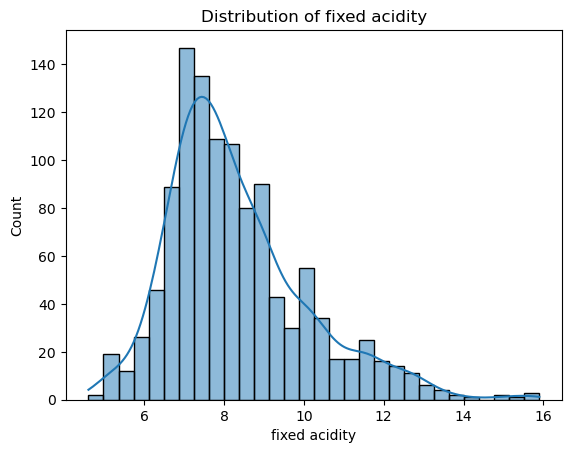

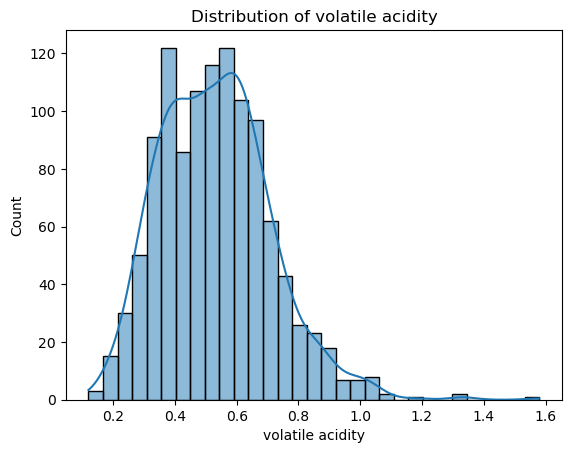

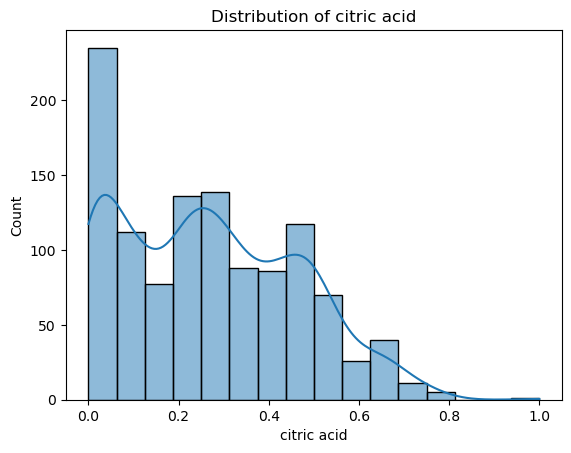

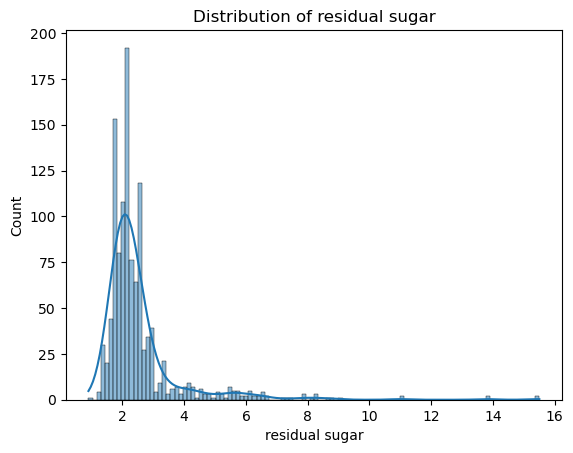

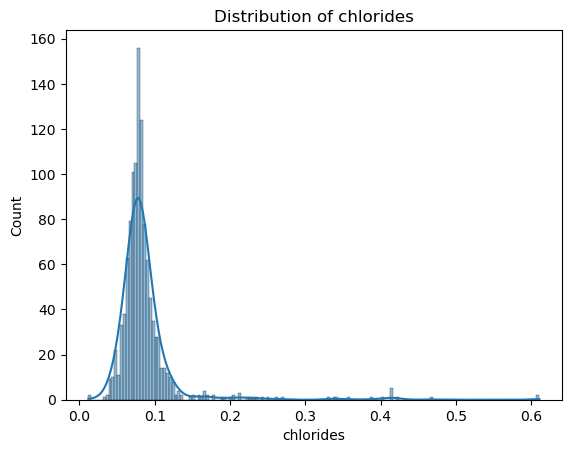

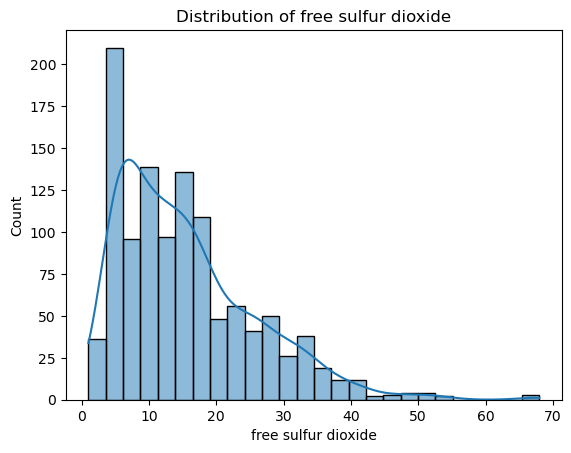

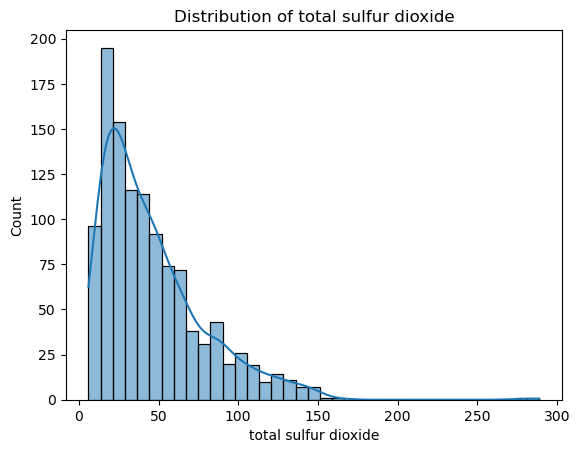

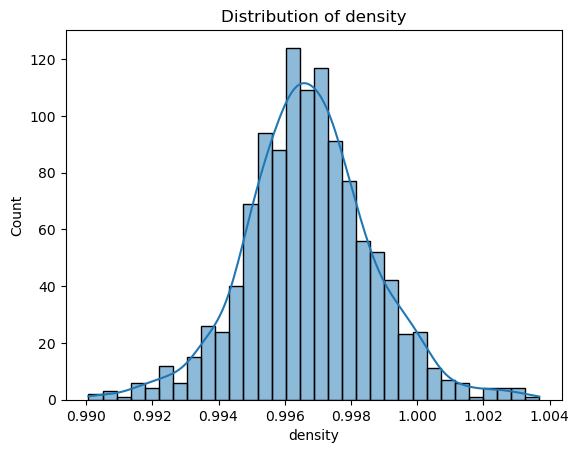

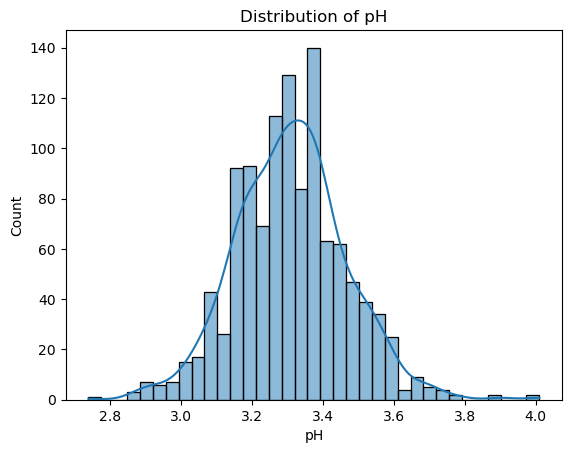

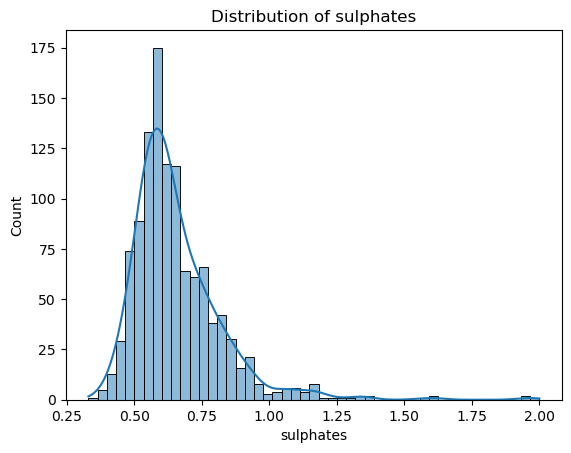

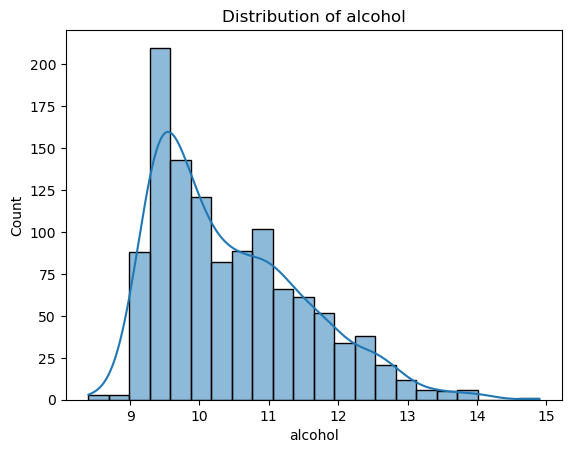

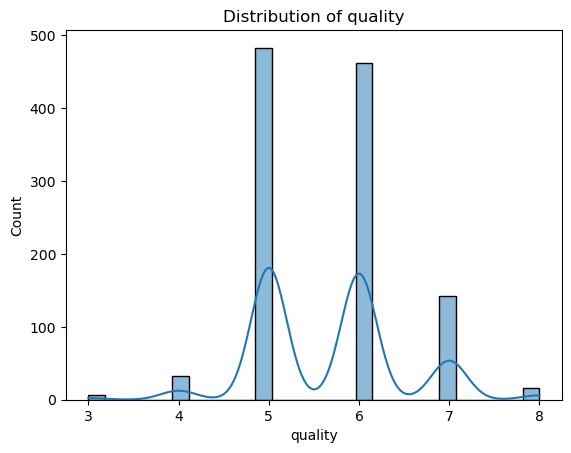

In [8]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

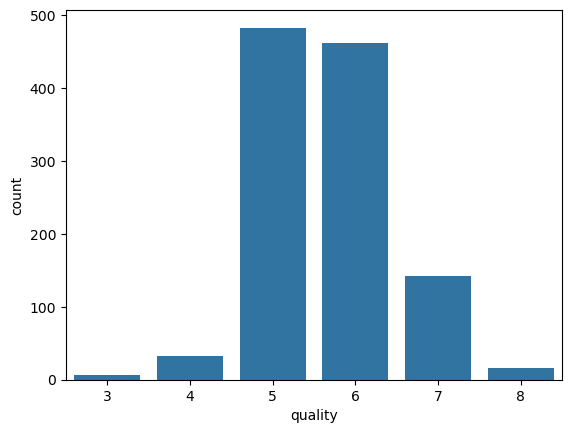

In [9]:
sns.countplot(x='quality',data=df)
plt.show()

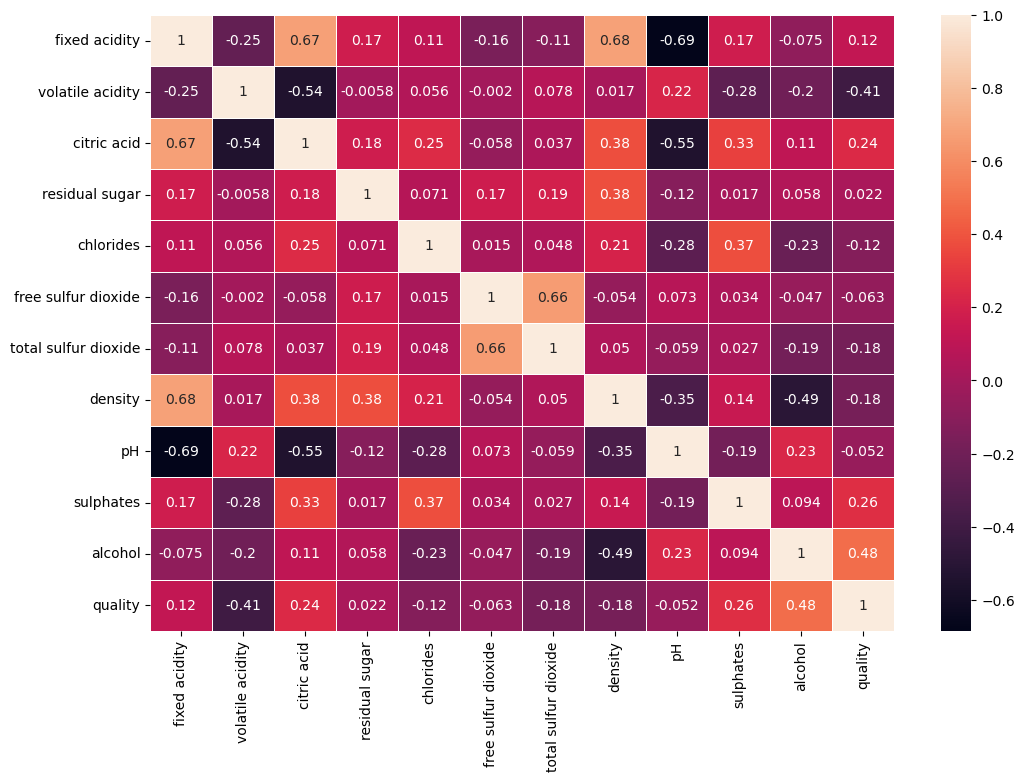

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

In [11]:
X=df.drop('quality',axis=1)
y=df['quality']

In [12]:
def value(x):
    if x>5:
        return 1
    else:
        return 0
y=y.apply(value)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier
rf=DecisionTreeClassifier(splitter='best',
                          min_samples_split=16,
                          min_samples_leaf=19,
                          max_features=None,
                          max_depth=15,
                          criterion='entropy')
rf.fit(X_train_scaled,y_train)
train_prediction=rf.predict(X_train_scaled)
test_prediction=rf.predict(X_test_scaled)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
print("Training set")
print(confusion_matrix(y_train,train_prediction))
print(classification_report(y_train,train_prediction))

Training set
[[273  89]
 [ 74 364]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       362
           1       0.80      0.83      0.82       438

    accuracy                           0.80       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.80      0.80       800



In [17]:
print("Test set")
print(confusion_matrix(y_test,test_prediction))
print(classification_report(y_test,test_prediction))

Test set
[[108  52]
 [ 42 141]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       160
           1       0.73      0.77      0.75       183

    accuracy                           0.73       343
   macro avg       0.73      0.72      0.72       343
weighted avg       0.73      0.73      0.73       343



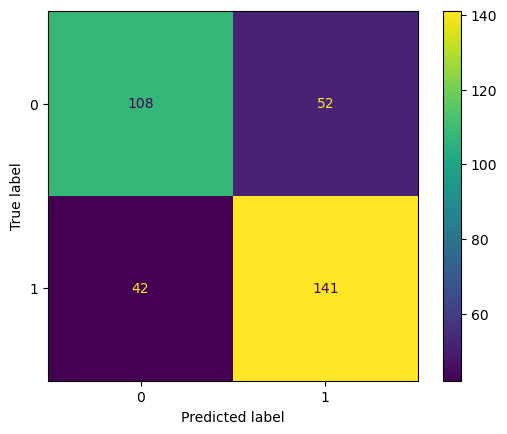

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,roc_curve,auc
cm=confusion_matrix(y_test,test_prediction)
display=ConfusionMatrixDisplay(cm)
display.plot()

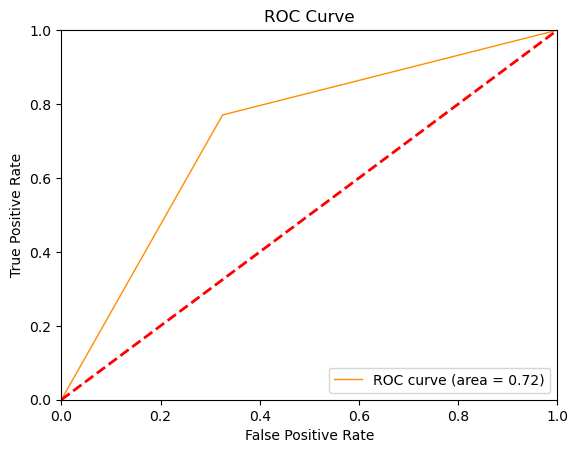

In [19]:
fpr,tpr,thersholds=roc_curve(y_test,test_prediction)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()